In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("Data1.xlsx")

In [3]:
df

,Date,Region,Sales Rep,Customer,Product,COGS,Sales
0,2004-06-17,MidWest,Harry,ExcelIsVeryFun.com,MWN Item,6305.0008,9272.06
1,2004-06-17,East,Harry,Office Depot,MBP Item,5773.2000,8490.00
2,2004-06-17,South,Harry,ExcelIsVeryFun.com,KVM Item,8271.4896,9399.42
3,2004-06-17,West,Jon,Sherman Williams,UBU Item,4919.6028,7234.71
4,2004-06-17,North,Harry,Whole Foods,HES Item,5838.1500,7784.20
...,...,...,...,...,...,...,...
1994,2006-06-14,East,Steven,Peet's Coffee,EJL Item,2315.4340,3405.05
1995,2006-06-15,North,Harry,Amazon.com,ZON Item,5406.2703,9163.17
1996,2006-06-15,East,Jon,Amazon.com,ZET Item,6971.4975,9295.33
1997,2006-06-15,North,Harry,Solar and Wind Inc.,JFA Item,736.2520,836.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1999 non-null   datetime64[ns]
 1   Region     1999 non-null   object        
 2   Sales Rep  1999 non-null   object        
 3   Customer   1999 non-null   object        
 4   Product    1999 non-null   object        
 5   COGS       1999 non-null   float64       
 6   Sales      1999 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 109.4+ KB


In [5]:
df.describe(include='O')

,Region,Sales Rep,Customer,Product
count,1999,1999,1999,1999
unique,5,8,14,1882
top,East,Harry,Sherman Williams,RAR Item
freq,688,277,156,3


In [6]:
df.describe()

,COGS,Sales
count,1999.000000,1999.000000
mean,3148.949353,5041.272721
std,2057.604330,2875.600841
min,7.410400,12.560000
25%,1456.424750,2557.620000
50%,2963.233800,4976.420000
75%,4456.441000,7526.840000
max,9318.958000,9994.240000


In [7]:
df.duplicated().sum()

0

In [8]:
df.groupby("Region").Sales.sum()

Region
East       3426489.59
MidWest    1651501.56
North      1723421.38
South      1706418.14
West       1569673.50
Name: Sales, dtype: float64

In [51]:
df.groupby(["Region"])['Sales','COGS'].count()

C:\Users\admin\AppData\Local\Temp\ipykernel_3916\1828492768.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Region"])['Sales','COGS'].count()


,Sales,COGS
Region,,
East,688,688
MidWest,314,314
North,342,342
South,335,335
West,320,320


In [54]:
df.groupby(["Region"])['Sales','COGS'].()

C:\Users\admin\AppData\Local\Temp\ipykernel_3916\395267235.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Region"])['Sales','COGS'].mean()


,Sales,COGS
Region,,
East,4980.362776,3073.589504
MidWest,5259.559108,3390.568526
North,5039.243801,3109.908385
South,5093.785493,3116.845563
West,4905.229688,3149.217907


In [57]:
df.groupby(['Region','Sales Rep'])['Sales'].mean().round(2)

Region   Sales Rep
East     Harry        5291.75
         James        4820.84
         Jon          4524.26
         Luke         4909.05
         Rhonda       5026.00
         Sherry       5475.47
         Steven       4863.30
         Tom          4814.02
MidWest  Harry        5060.97
         James        4603.66
         Jon          5794.47
         Luke         6036.71
         Rhonda       4821.38
         Sherry       5299.01
         Steven       4881.61
         Tom          5817.45
North    Harry        5321.18
         James        4503.66
         Jon          5234.04
         Luke         4957.15
         Rhonda       4915.80
         Sherry       4614.01
         Steven       5683.27
         Tom          5067.62
South    Harry        5055.53
         James        5476.92
         Jon          5503.68
         Luke         5133.88
         Rhonda       5035.07
         Sherry       4714.17
         Steven       5121.23
         Tom          4744.38
West     Harry       

In [75]:
grp=df.groupby(['Region','Sales Rep'])['Sales'].sum().reset_index()

<AxesSubplot:xlabel='Sales Rep', ylabel='Sales'>

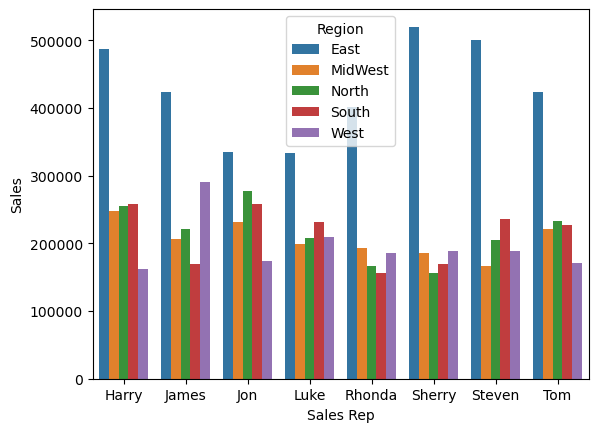

In [76]:
sns.barplot(x="Sales Rep",y="Sales",hue="Region",data=grp)

In [77]:
srp=df.groupby(['Sales Rep'])['Sales'].sum().reset_index()

In [79]:
srp

,Sales Rep,Sales
0,Harry,1409540.88
1,James,1312633.25
2,Jon,1276210.40
3,Luke,1182348.62
4,Rhonda,1103441.88
5,Sherry,1220931.66
6,Steven,1296157.22
7,Tom,1276240.26


<AxesSubplot:xlabel='Sales Rep', ylabel='Sales'>

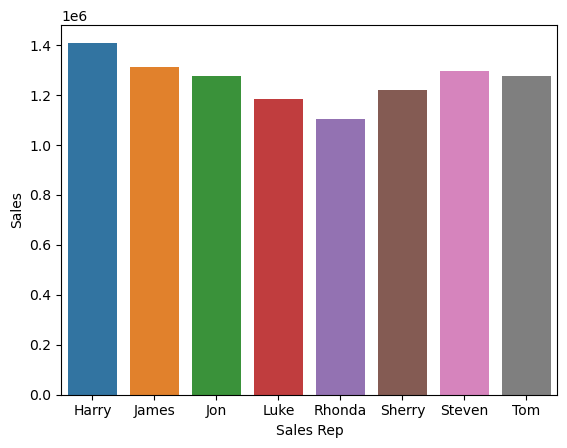

In [78]:
sns.barplot(x="Sales Rep",y="Sales",data=srp)

In [80]:
zrp=df.groupby(['Region'])['Sales'].sum().reset_index()

In [82]:
zrp

,Region,Sales
0,East,3426489.59
1,MidWest,1651501.56
2,North,1723421.38
3,South,1706418.14
4,West,1569673.50


<AxesSubplot:xlabel='Region', ylabel='Sales'>

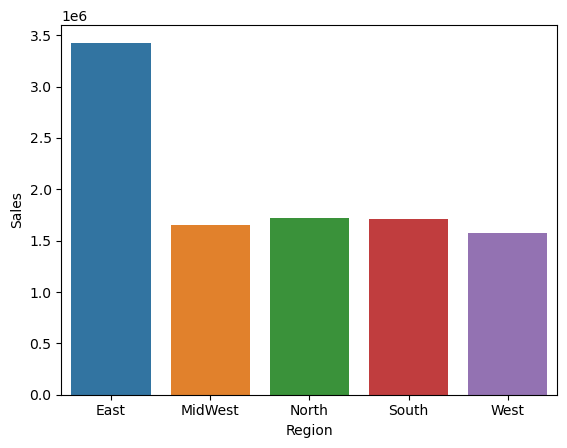

In [81]:
sns.barplot(x="Region",y="Sales",data=zrp)